In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = pd.read_csv('/Users/innas/Documents/DSI/visualization/02_activities/assignments/neighbourhood-crime-rates - 4326.csv',
on_bad_lines='skip')
df


,_id,AREA_NAME,HOOD_ID,ASSAULT_2014,ASSAULT_2015,ASSAULT_2016,ASSAULT_2017,ASSAULT_2018,ASSAULT_2019,ASSAULT_2020,...,THEFTOVER_RATE_2017,THEFTOVER_RATE_2018,THEFTOVER_RATE_2019,THEFTOVER_RATE_2020,THEFTOVER_RATE_2021,THEFTOVER_RATE_2022,THEFTOVER_RATE_2023,THEFTOVER_RATE_2024,POPULATION_2024,geometry
0,1,South Eglinton-Davisville,174,55,56,66,73,74,62,74,...,4.915454,14.018037,13.369579,17.041582,24.314138,11.784578,29.877502,21.895412,27403,"{""coordinates"": [[[[-79.3863542900264, 43.6978..."
1,2,North Toronto,173,53,57,47,61,66,84,80,...,15.913431,36.767410,27.324270,44.651402,11.916821,22.527596,36.672256,30.109901,19927,"{""coordinates"": [[[[-79.3974398976879, 43.7069..."
2,3,Dovercourt Village,172,62,65,92,105,106,113,91,...,22.389730,30.136368,30.436768,23.027327,15.363343,30.355923,22.052338,51.139683,13688,"{""coordinates"": [[[[-79.4341164165158, 43.6601..."
3,4,Junction-Wallace Emerson,171,164,159,171,161,163,186,171,...,24.498795,36.736195,16.320536,36.677807,32.307568,31.404570,33.652409,47.570259,27328,"{""coordinates"": [[[[-79.4387032547807, 43.6676..."
4,5,Yonge-Bay Corridor,170,387,521,481,602,576,660,377,...,290.095306,353.045013,489.814972,263.812469,188.747726,348.980438,329.405792,289.715118,16568,"{""coordinates"": [[[[-79.3840431592607, 43.6449..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,West Humber-Clairville,1,289,306,291,301,314,255,248,...,167.843506,146.991013,186.738678,160.178482,152.684708,169.524490,211.275146,201.148666,37783,"{""coordinates"": [[[[-79.5903745028226, 43.7340..."
154,155,Black Creek,24,222,226,279,246,199,216,269,...,76.205849,35.972839,40.599060,72.378540,40.549675,35.752590,56.457916,52.087856,23038,"{""coordinates"": [[[[-79.5191491527649, 43.7739..."
155,156,Pelmo Park-Humberlea,23,58,45,59,53,73,77,54,...,54.190750,35.625221,61.533051,86.767899,17.015484,74.812965,47.885075,55.009823,12725,"{""coordinates"": [[[[-79.532254418425, 43.73505..."
156,157,Humbermede,22,105,128,106,150,107,150,84,...,42.826553,60.034821,47.139236,57.853630,73.247688,49.290760,52.099613,40.778877,19618,"{""coordinates"": [[[[-79.5281298918329, 43.7442..."


In [49]:
print(df.columns.tolist())

['_id', 'AREA_NAME', 'HOOD_ID', 'ASSAULT_2014', 'ASSAULT_2015', 'ASSAULT_2016', 'ASSAULT_2017', 'ASSAULT_2018', 'ASSAULT_2019', 'ASSAULT_2020', 'ASSAULT_2021', 'ASSAULT_2022', 'ASSAULT_2023', 'ASSAULT_2024', 'ASSAULT_RATE_2014', 'ASSAULT_RATE_2015', 'ASSAULT_RATE_2016', 'ASSAULT_RATE_2017', 'ASSAULT_RATE_2018', 'ASSAULT_RATE_2019', 'ASSAULT_RATE_2020', 'ASSAULT_RATE_2021', 'ASSAULT_RATE_2022', 'ASSAULT_RATE_2023', 'ASSAULT_RATE_2024', 'AUTOTHEFT_2014', 'AUTOTHEFT_2015', 'AUTOTHEFT_2016', 'AUTOTHEFT_2017', 'AUTOTHEFT_2018', 'AUTOTHEFT_2019', 'AUTOTHEFT_2020', 'AUTOTHEFT_2021', 'AUTOTHEFT_2022', 'AUTOTHEFT_2023', 'AUTOTHEFT_2024', 'AUTOTHEFT_RATE_2014', 'AUTOTHEFT_RATE_2015', 'AUTOTHEFT_RATE_2016', 'AUTOTHEFT_RATE_2017', 'AUTOTHEFT_RATE_2018', 'AUTOTHEFT_RATE_2019', 'AUTOTHEFT_RATE_2020', 'AUTOTHEFT_RATE_2021', 'AUTOTHEFT_RATE_2022', 'AUTOTHEFT_RATE_2023', 'AUTOTHEFT_RATE_2024', 'BIKETHEFT_2014', 'BIKETHEFT_2015', 'BIKETHEFT_2016', 'BIKETHEFT_2017', 'BIKETHEFT_2018', 'BIKETHEFT_2019', 'B

In [ ]:
# identifying all columns with crime types 
crime_cols = [col for col in df.columns if any(y in col for y in [str(y) for y in range(2014, 2025)])] 
crime_cols = [col for col in crime_cols if any(c in col for c in ['_RATE_', '_'])]

# separating values into 2 different columns: count and rate 
count_cols = [col for col in crime_cols if '_RATE_' not in col and "_" in col] 
rate_cols = [col for col in crime_cols if '_RATE_' in col]

# Melt count data 
df_count = pd.melt(df, id_vars=['AREA_NAME', 'HOOD_ID'], value_vars=count_cols, var_name='Crime_Year', value_name='Value') 
df_count['Value Type'] = 'Count'
df_count



,AREA_NAME,HOOD_ID,Crime_Year,Value,Value Type
0,South Eglinton-Davisville,174,ASSAULT_2014,55.0,Count
1,North Toronto,173,ASSAULT_2014,53.0,Count
2,Dovercourt Village,172,ASSAULT_2014,62.0,Count
3,Junction-Wallace Emerson,171,ASSAULT_2014,164.0,Count
4,Yonge-Bay Corridor,170,ASSAULT_2014,387.0,Count
...,...,...,...,...,...
15795,West Humber-Clairville,1,POPULATION_2024,37783.0,Count
15796,Black Creek,24,POPULATION_2024,23038.0,Count
15797,Pelmo Park-Humberlea,23,POPULATION_2024,12725.0,Count
15798,Humbermede,22,POPULATION_2024,19618.0,Count


In [ ]:
# Melt rate data 
df_rate = pd.melt(df, id_vars=['AREA_NAME', 'HOOD_ID'], value_vars=rate_cols, var_name='Crime_Year', value_name='Value') 

df_rate['Value Type'] = 'Rate'
df_rate

,AREA_NAME,HOOD_ID,Crime_Year,Value,Value Type
0,South Eglinton-Davisville,174,ASSAULT_RATE_2014,301.171844,Rate
1,North Toronto,173,ASSAULT_RATE_2014,455.757172,Rate
2,Dovercourt Village,172,ASSAULT_RATE_2014,456.150665,Rate
3,Junction-Wallace Emerson,171,ASSAULT_RATE_2014,698.258606,Rate
4,Yonge-Bay Corridor,170,ASSAULT_RATE_2014,3750.000000,Rate
...,...,...,...,...,...
15637,West Humber-Clairville,1,THEFTOVER_RATE_2024,201.148666,Rate
15638,Black Creek,24,THEFTOVER_RATE_2024,52.087856,Rate
15639,Pelmo Park-Humberlea,23,THEFTOVER_RATE_2024,55.009823,Rate
15640,Humbermede,22,THEFTOVER_RATE_2024,40.778877,Rate


In [52]:
# getting crime type and year from Crime_Year
def get_crime_year(cy, rate=False):
    if rate:
        return cy.split('_RATE_')[0], int(cy.split('_RATE_')[1])
    else:
        return cy.split('_')[0], int(cy.split('_')[1])

df_count[['Crime Type', 'Year']] = df_count['Crime_Year'].apply(lambda x: pd.Series(get_crime_year(x)))
df_rate[['Crime Type', 'Year']] = df_rate['Crime_Year'].apply(lambda x: pd.Series(get_crime_year(x, rate=True)))

df_total = pd.concat([df_count, df_rate], ignore_index=True)
df_total

,AREA_NAME,HOOD_ID,Crime_Year,Value,Value Type,Crime Type,Year
0,South Eglinton-Davisville,174,ASSAULT_2014,55.000000,Count,ASSAULT,2014
1,North Toronto,173,ASSAULT_2014,53.000000,Count,ASSAULT,2014
2,Dovercourt Village,172,ASSAULT_2014,62.000000,Count,ASSAULT,2014
3,Junction-Wallace Emerson,171,ASSAULT_2014,164.000000,Count,ASSAULT,2014
4,Yonge-Bay Corridor,170,ASSAULT_2014,387.000000,Count,ASSAULT,2014
...,...,...,...,...,...,...,...
31437,West Humber-Clairville,1,THEFTOVER_RATE_2024,201.148666,Rate,THEFTOVER,2024
31438,Black Creek,24,THEFTOVER_RATE_2024,52.087856,Rate,THEFTOVER,2024
31439,Pelmo Park-Humberlea,23,THEFTOVER_RATE_2024,55.009823,Rate,THEFTOVER,2024
31440,Humbermede,22,THEFTOVER_RATE_2024,40.778877,Rate,THEFTOVER,2024


In [53]:
df_total['AREA_NAME'].unique()


array(['South Eglinton-Davisville', 'North Toronto', 'Dovercourt Village',
       'Junction-Wallace Emerson', 'Yonge-Bay Corridor', 'Bay-Cloverhill',
       'Bendale-Glen Andrew', 'Downsview', 'Oakdale-Beverley Heights',
       'Avondale', 'East Willowdale', 'Yonge-Doris', 'Fenside-Parkwoods',
       "Parkwoods-O'Connor Hills", "East L'Amoreaux", "L'Amoreaux West",
       'Malvern East', 'Malvern West', 'Morningside Heights',
       'West Rouge', 'Woburn North', 'Golfdale-Cedarbrae-Woburn',
       'Guildwood', 'Scarborough Village', 'Eglinton East', 'West Hill',
       'Morningside', 'Highland Creek', 'Centennial Scarborough',
       'Milliken', 'Agincourt North', 'Agincourt South-Malvern West',
       'Dorset Park', 'Ionview', 'Kennedy Park', 'Cliffcrest',
       'Birchcliffe-Cliffside', 'Downtown Yonge East', 'Church-Wellesley',
       'St Lawrence-East Bayfront-The Islands', 'Harbourfront-CityPlace',
       'Wellington Place', 'Fort York-Liberty Village', 'West Queen West',
       '

In [54]:
# filter hoods for rates
top_areas = (df_rate.groupby('AREA_NAME')['Value'].sum().nlargest(10).index) 
df_filtered_hood_rates = df_rate[df_rate['AREA_NAME'].isin(top_areas)]
df_filtered_hood_rates

,AREA_NAME,HOOD_ID,Crime_Year,Value,Value Type,Crime Type,Year
4,Yonge-Bay Corridor,170,ASSAULT_RATE_2014,3750.000000,Rate,ASSAULT,2014
37,Downtown Yonge East,168,ASSAULT_RATE_2014,2587.185059,Rate,ASSAULT,2014
41,Wellington Place,164,ASSAULT_RATE_2014,2811.570801,Rate,ASSAULT,2014
79,University,79,ASSAULT_RATE_2014,1918.158569,Rate,ASSAULT,2014
80,Kensington-Chinatown,78,ASSAULT_RATE_2014,1915.915649,Rate,ASSAULT,2014
...,...,...,...,...,...,...,...
15566,Moss Park,73,THEFTOVER_RATE_2024,69.132385,Rate,THEFTOVER,2024
15605,Yorkdale-Glen Park,31,THEFTOVER_RATE_2024,259.118011,Rate,THEFTOVER,2024
15609,York University Heights,27,THEFTOVER_RATE_2024,123.919579,Rate,THEFTOVER,2024
15637,West Humber-Clairville,1,THEFTOVER_RATE_2024,201.148666,Rate,THEFTOVER,2024


In [55]:
# filter hoods for counts
top_areas_count = (df_count.groupby('AREA_NAME')['Value'].sum().nlargest(10).index) 
df_filtered_hood_counts = df_count[df_count['AREA_NAME'].isin(top_areas)]
df_filtered_hood_counts

,AREA_NAME,HOOD_ID,Crime_Year,Value,Value Type,Crime Type,Year
4,Yonge-Bay Corridor,170,ASSAULT_2014,387.0,Count,ASSAULT,2014
37,Downtown Yonge East,168,ASSAULT_2014,342.0,Count,ASSAULT,2014
41,Wellington Place,164,ASSAULT_2014,416.0,Count,ASSAULT,2014
79,University,79,ASSAULT_2014,135.0,Count,ASSAULT,2014
80,Kensington-Chinatown,78,ASSAULT_2014,355.0,Count,ASSAULT,2014
...,...,...,...,...,...,...,...
15724,Moss Park,73,POPULATION_2024,28930.0,Count,POPULATION,2024
15763,Yorkdale-Glen Park,31,POPULATION_2024,20454.0,Count,POPULATION,2024
15767,York University Heights,27,POPULATION_2024,32279.0,Count,POPULATION,2024
15795,West Humber-Clairville,1,POPULATION_2024,37783.0,Count,POPULATION,2024


In [56]:
#selecting 10 top hoods by max of reported crimes separately for counts and for rates
top_hoods_count = (df_count.groupby('AREA_NAME')['Value'].max().sort_values(ascending=False).head(10).index)
top_hoods_rate = (df_rate.groupby('AREA_NAME')['Value'].max().sort_values(ascending=False).head(10).index)

df_count_top10 = df_count[df_count['AREA_NAME'].isin(top_hoods_count)].copy()
df_rate_top10  = df_rate[df_rate['AREA_NAME'].isin(top_hoods_rate)].copy()


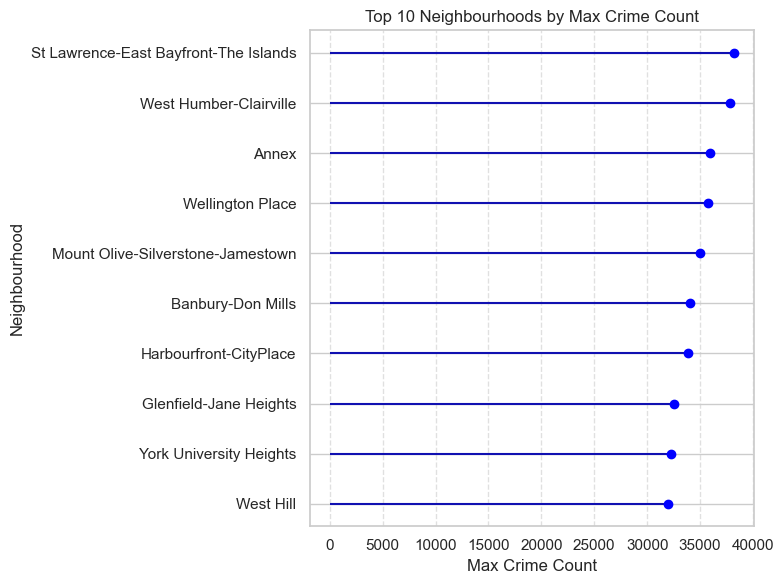

In [84]:
#plotting top 10 hoods for count, style 2:

count_lollipop = (df_count_top10.groupby('AREA_NAME')['Value'].max().sort_values())

ordered_count_lpop = count_lollipop.reset_index()
ordered_count_lpop.columns = ['AREA_NAME', 'MAX_VALUE']
my_range = range(1, len(ordered_count_lpop) + 1)

plt.figure(figsize=(8, 6))
plt.hlines(y=my_range, xmin=0, xmax=ordered_count_lpop['MAX_VALUE'], color='#1010B1')
plt.plot(ordered_count_lpop['MAX_VALUE'], my_range, "o", color='#0000FF')

plt.yticks(my_range, ordered_count_lpop['AREA_NAME'])
plt.title('Top 10 Neighbourhoods by Max Crime Count', loc='center')
plt.xlabel('Max Crime Count')
plt.ylabel('Neighbourhood')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Top 10 Neighbourhoods by Max Crime Count.png", dpi=300, bbox_inches='tight')
plt.show()

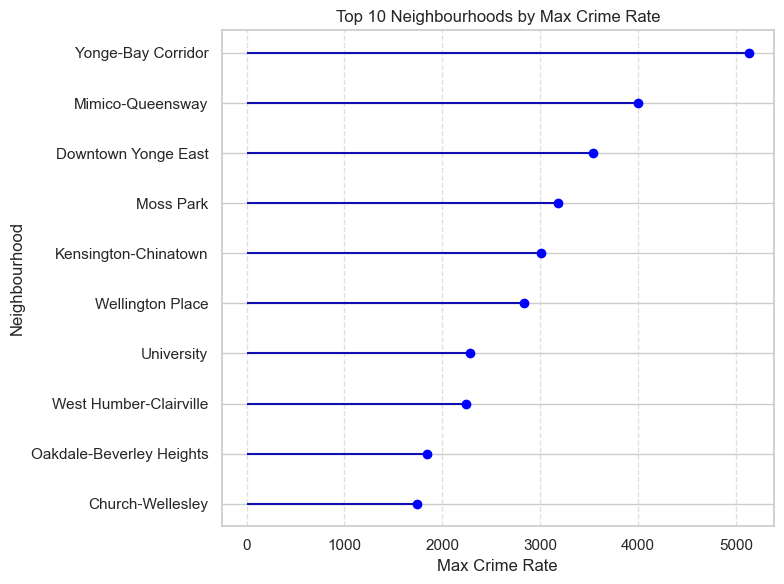

In [85]:
#plotting top 10 hoods for rate, style 2:

rate_lollipop = (df_rate_top10.groupby('AREA_NAME')['Value'].max().sort_values())

ordered_rate_lpop = rate_lollipop.reset_index()
ordered_rate_lpop.columns = ['AREA_NAME', 'MAX_VALUE']
my_range = range(1, len(ordered_rate_lpop) + 1)

plt.figure(figsize=(8, 6))
plt.hlines(y=my_range, xmin=0, xmax=ordered_rate_lpop['MAX_VALUE'], color='#1010B1')
plt.plot(ordered_rate_lpop['MAX_VALUE'], my_range, "o", color='#0000FF')

plt.yticks(my_range, ordered_rate_lpop['AREA_NAME'])
plt.title('Top 10 Neighbourhoods by Max Crime Rate', loc='center')
plt.xlabel('Max Crime Rate')
plt.ylabel('Neighbourhood')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("Top 10 Neighbourhoods by Max Crime Rate.png", dpi=300, bbox_inches='tight')
plt.show()

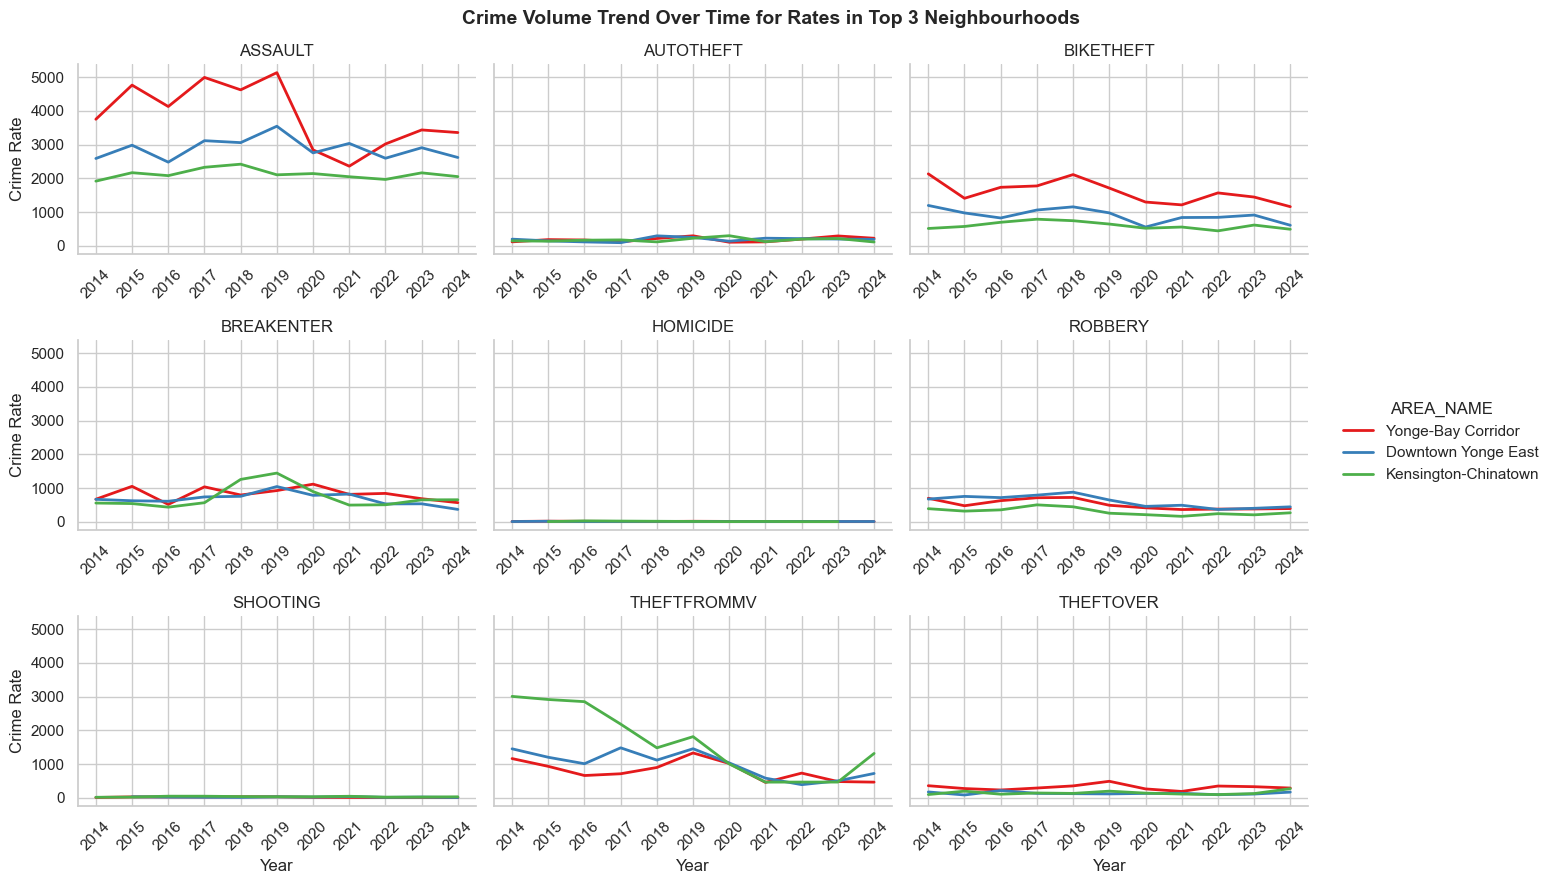

In [86]:
#plotting crime volume over time for rates df
sns.set_theme(style='whitegrid')
top_3_hoods_rate = (df_rate_top10.groupby('AREA_NAME')['Value'].sum().nlargest(3).index)
df_rate_top3 = df_rate_top10[df_rate_top10['AREA_NAME'].isin(top_3_hoods_rate)].copy()
df_rate_top3['Year'] = df_rate_top3['Year'].astype(str)

#one subplot per crime type
g = sns.relplot(
    data=df_rate_top3,
    x='Year', y='Value',
    col='Crime Type', hue='AREA_NAME',
    kind='line', col_wrap=3,
    height=3, aspect=1.5,
    linewidth=2, palette='Set1'
)
for ax in g.axes.flatten(): ax.tick_params(axis='x', rotation=45, labelbottom=True)

g.set_titles('{col_name}')
g.set_axis_labels('Year', 'Crime Rate')
g.fig.suptitle('Crime Volume Trend Over Time for Rates in Top 3 Neighbourhoods', fontsize=14, weight='bold')
g.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig("Crime Volume Trend Over Time for Rates in Top 3 Neighbourhoods.png", dpi=300, bbox_inches='tight')
plt.show()


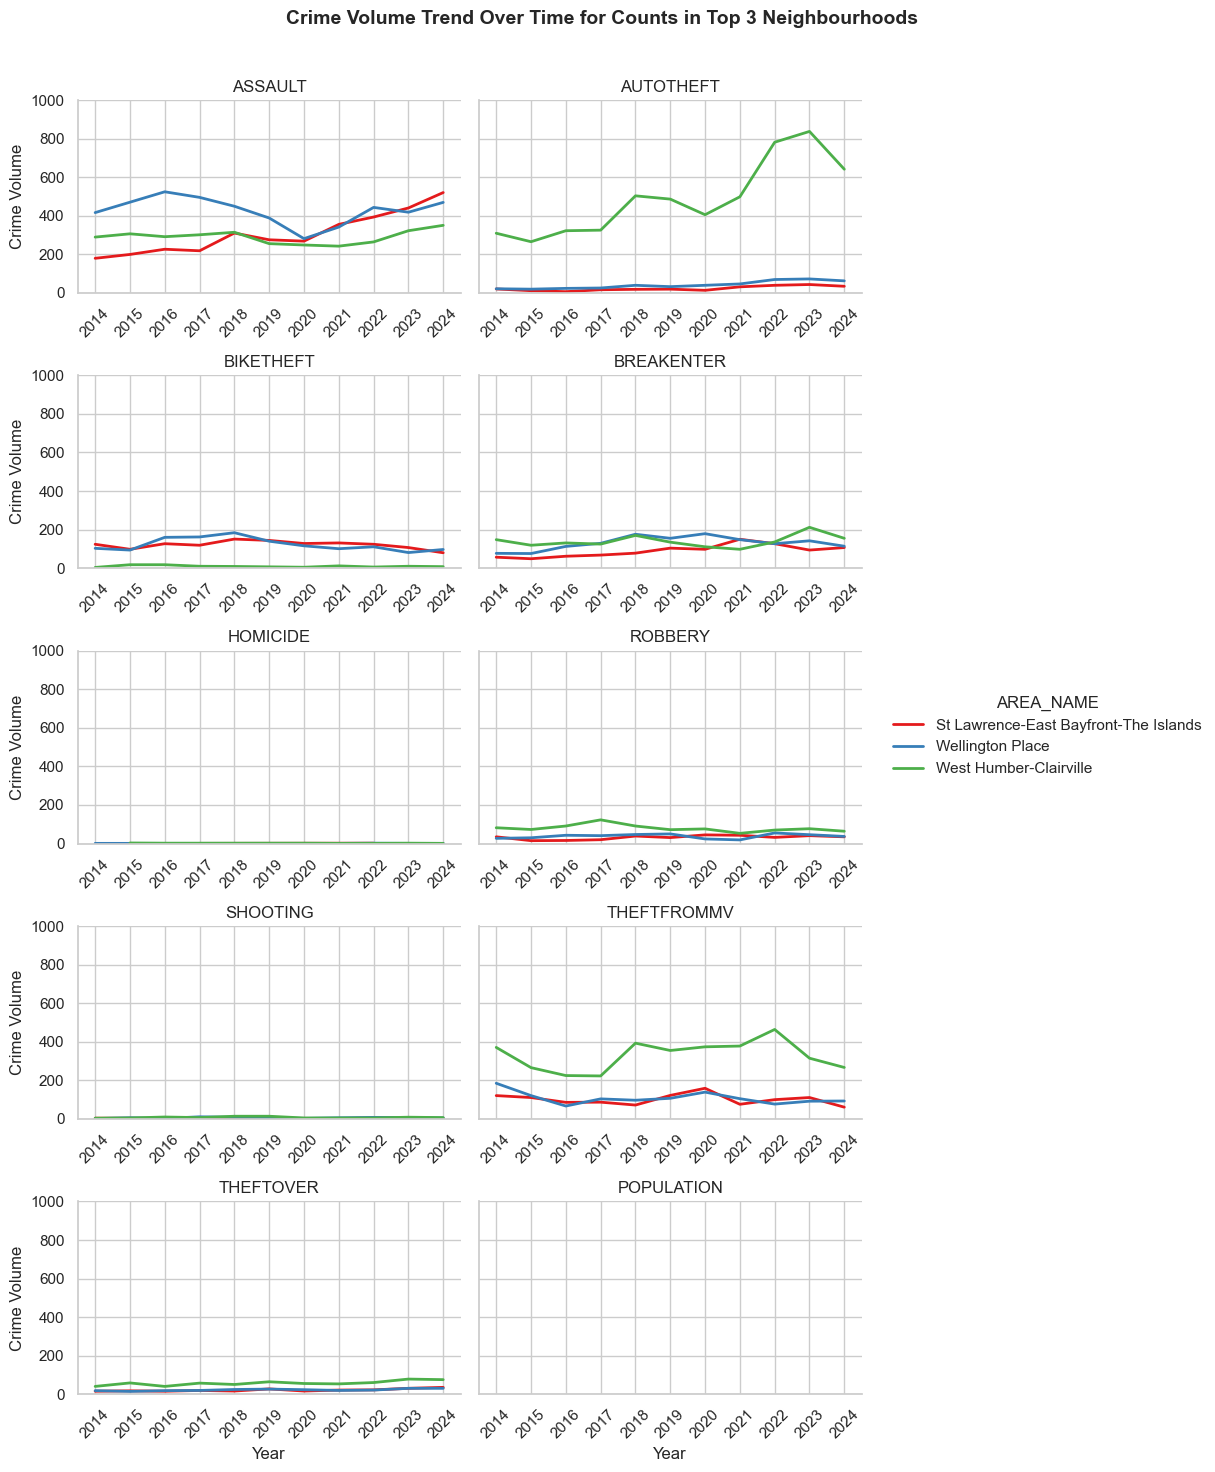

In [87]:
#plotting crime volume over time for counts df
sns.set_theme(style='whitegrid')
top_3_hoods_count = (df_count_top10.groupby('AREA_NAME')['Value'].sum().nlargest(3).index)
df_count_top3 = df_count_top10[df_count_top10['AREA_NAME'].isin(top_3_hoods_count)].copy()
df_count_top3['Year'] = df_count_top3['Year'].astype(str)

#one subplot per crime type
g = sns.relplot(
    data=df_count_top3,
    x='Year', y='Value',
    col='Crime Type', hue='AREA_NAME',
    kind='line', col_wrap=2,
    height=3, aspect=1.5,
    linewidth=2, palette='Set1'
)

for ax in g.axes.flatten(): ax.tick_params(axis='x', rotation=45, labelbottom=True)
g.set(ylim=(0, 1000))


g.set_titles('{col_name}')
g.set_axis_labels('Year', 'Crime Volume')
g.fig.suptitle('Crime Volume Trend Over Time for Counts in Top 3 Neighbourhoods', fontsize=14, weight='bold')
g.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig("Crime Volume Trend Over Time for Counts in Top 3 Neighbourhoods.png", dpi=300, bbox_inches='tight')
plt.show()
